In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

__Now lets create some data of our own which would be much better fitted with a parabolic plane rather than a simple plane.__

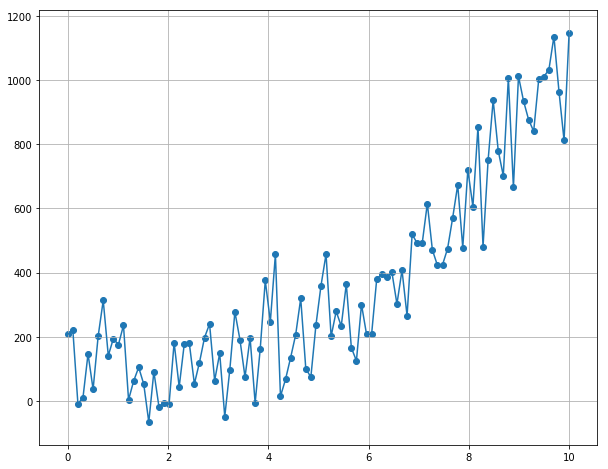

In [8]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.plot(X, y);
plt.scatter(X, y)
plt.grid(True)

__Now, let’s perform Linear Regression to see how well a simple linear model fits to this kind of data.__

0.7259338498100694


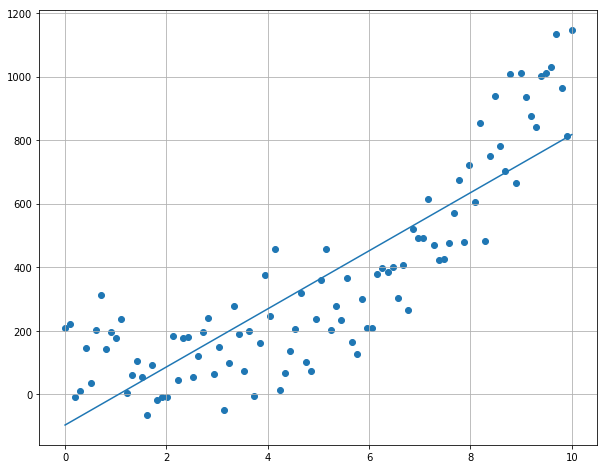

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
model_pred = lin_reg.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
plt.grid(True)
print(r2_score(y, model_pred))

__The R2 score came out to be 0.7765 and the plot came to look like this.The model doesn’t seem to represent the data well with lot of the actual data points lying far away from the regression line.__

__Now, let’s use Polynomial features and see how the resulting model turns out to be. We will be importing a pre-processing function off of sklearn for this. Then, lets fit transform the data to give us the polynomial featuress. Here, we are using degree = 2 for a parabolic function. __

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

__Now lets instantiate another linear regression model and then fit the model using the polynomial features i.e. X_poly.__

0.8784424737030544


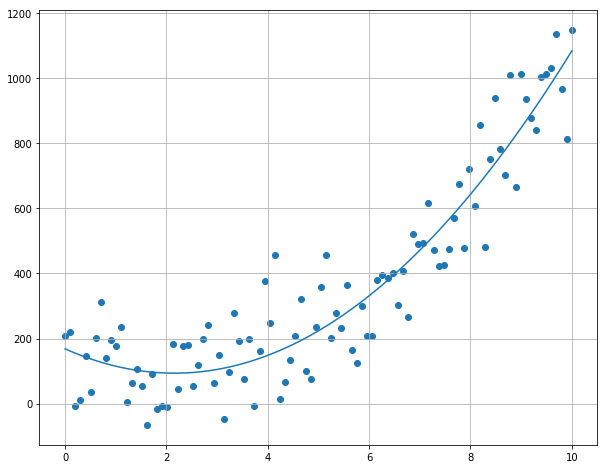

In [15]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
plt.grid(True)
print(r2_score(y, y_pred))

__The R2 score came out to be 0.899 and the plot came to look like this. Clearly, the polynomial features of degree 2 helped to fit the data much better rather than simple linear features.__

We can play around with the degrees of the features and change how my model fits to different kinds of data using this methodology.

For e.g. if I put degree = 3 for the polynomial features,

In [19]:
poly_reg_2 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X.reshape(-1, 1))

0.8794193871998025


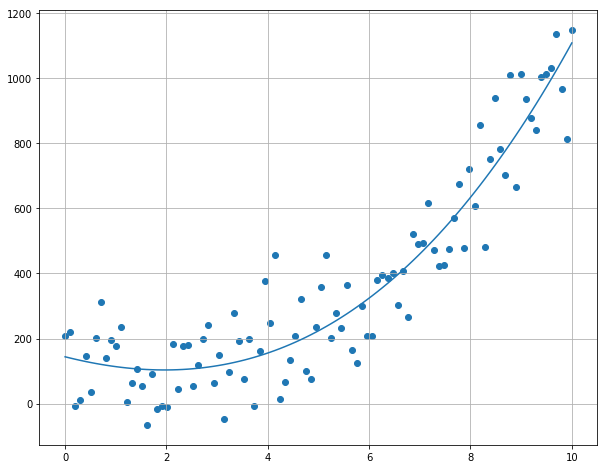

In [33]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_2, y.reshape(-1, 1))
y_pred = lin_reg_3.predict(X_poly_2)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
plt.grid(True)
print(r2_score(y, y_pred))